#timetamer

#### 1. Setting up the problem

Here is the table representing the schema for the scheduler. I have made the following changes to it so that it representes my schedule more precisely and takes into account more constraints, thus making it more relistic and flexible. \\
The following elements were left unchanged from the template:
*    `id` (presented by integers 0 - \(n\), where \(n\) is the number of tasks);
*   `description` (a string briefly describing the task);
*   `duration` (in minutes, how long it takes to execute the task);
*   `status` (there are three states of tasks: 'N' for the tasks that have not been started yet, 'I' for tasks that are currently being done, or initiated, in progress, and 'C' for the tasks that have been already completed); and
*   `dependencies` (which are also treated as prerequisites that some tasks might have, represented by the task id's of the tasks that I have to complete before I start the current chosen task). \\

Among the changes made, the following elements were added:
*   `time_constraint` (represented as a string representing time of the day if the event is happening and that I have to attend at a certain time, such as a class at 8:00, or, if the task can be done at any time, it is denoted as  "-");
*  `location` of the task, which is indicated as a string, to help me account for the commute time, which was also added to the schema;
*   `travel_time` represented in minutes, which calculates the time that I need to commute to the location of some of the tasks. If some tasks are at the same location or can be done online, they would be indicated as a '0'.

The table with the list of tasks for one of the Thursdays is below:

| id | description | duration | dependencies | time_constraint | location | travel_time | status |
|-------|-------------|-----------|----------------|----------------|-----------|-------------|---------|
| 0 | SS144 class | 90 | []  | 6:00 | Dongdaemun Residence Hall | 0 | N |
| 1 | Breakfast | 30 | [0]  | - | Dongdaemun Residence Hall | 0 | N |
| 2 | CS110 class | 90 | [1]  | 8:00 | Dongdaemun Residence Hall | 0 | N |
| 3 | Workout | 45 | [1]  | 10:00 | Dongdaemun Residence Hall | 0 | N |
| 4 | Prepare for the GDG meeting (complete the tasks from the previous meeting) | 60 | [] | - | Dongdaemun Residence Hall | 0 | N |
| 5 | GDG meeting | 45 | [4] | 13:00 | Sinseoul Residence Hall | 30 | N |
| 6 | Lunch with a friend at a Korean restaurant | 60 | [1] | 14:00 | Bibimeal | 10 | N |
| 7 | Study at the cafe overlooking the Han River | 90 | [6] | - | CheckNGrow Space | 30 | N |
| 8 | Visit the K-food Festival | 90 | [6, 7] | 18:30 | K-food Festival (near the Gyeongbokgung Palace) | 30 | N |
| 9 | Visit Gyeongbokgung Palace | 90 | [8] | - | Gyeongbokgung Palace | 20 | N |
| 10 | Plan the trip for Quinquatria break | 60 | [9] | - | - | 20 | N |

The regular tasks include the classes, breakfast, workout, and weekly Google Developer Group (GDG) meeting, which I need to prepare for beforehand (dependency), as well as plan the trip that we are going to take with the group of friends for Quinquatria break. \\
Additionally, the city-specific tasks would include having a lunch and a dinner at the Korean restaurant adn tryinf traditional Korean dishes, such as bibimbap and Korean Food Festival, visiting one of the cultural landmarks - Gyeongbokgung Palace, and go for a walk along the Han River before going to work in the cafe on the 9th floor that overlooks the riverbank. \\
Most of my schedule is flexible, therefore, the dependecies of the tasks are either irrelevant because I complete the prerequisites (such as preparing for the meetings or doing PCW) a couple of days before the task is due; therefore, the dependencies are only relevant for the realtive locations for certain tasks (such as, I would only go to the Gyeongbokgung Palace if I am already at some place nearby, or I will only go for dinner with a friend if I was already studying with them at the cafe near the restaurant).

#### 2. Preparing the algortihmic strategy.

I've chosen to implement a dual priority queue system for task scheduling because it effectively handles the distinct nature of fixed-time versus flexible tasks while maintaining O(log n) efficiency for insertions and retrievals. This approach was presented in the video through a comparison of simple sorted lists versus priority queues.

The scheduler's algorithmic approach operates in three phases: task analysis, schedule building, and output generation. In the video, I illustrated this through a flowchart showing how tasks are first separated into fixed-time and flexible queues, then scheduled according to their computed utilities, with fixed-time tasks serving as immovable anchors around which flexible tasks are optimally arranged.

The priority calculation methodology is grounded in utility theory, using different utility functions for different aspects of task prioritization. It was not excplicitly stated in the video, but, in this situation, we use a risk-averse concave function ($U(x) = x^{0.5}$) for time-constrained tasks, a negative utility framework ($U(x) = -2(-x)^{0.5}$) for handling dependencies, and a combination of risk-averse and linear utilities for location efficiency and task type classification. This mathematically justified approach to priority calculation, which accounts for 40% time constraints, 30% dependencies, 20% location/duration efficiency, and 10% task type, creates a robust and theoretically sound basis for task prioritization that goes beyond simple numerical scoring.

Here is the link to [Loom Video](https://www.loom.com/share/cc7da3a4f00a485abf400e6383aa33b3?sid=5b0f1535-e172-41f5-ac5e-29b7f9355e3e) explaining how this approach is going to be used for the daily scheduler.

#### 3. Working on Python implementation of the dual-queue system .

#####`MaxHeap` class justification
Starting with the base `MaxHeapq` class, I chose to implement a max-heap because it makes it easier to extract higher utility values, because they will be indicates as higher priority tasks. This decision simplified the priority queue operations since tasks with the highest utility values would be found  at the root of the heap. `MaxHeap` class is a custom implementation of a priority queue (rather than using Python heapq) to handle operations like `heappush` (insert) and `heappop` (remove the highest-priority item)

##### Weighted Utility Calculation System
 In the provided code, each task’s utility is derived from factors such as time constraints (weighted at 40%), dependencies (30%), location/duration optimization (20%), and task type (10%). A task that must happen at a precise hour (e.g., a class scheduled at 08:00) is allocated more points under the time-constraint portion than a purely flexible task with no strict deadlines. Similarly, a task that is a prerequisite for others, or that is itself dependency-free, can score higher than one deeply embedded in a chain of dependencies. Location-based considerations also encourage clustering tasks at the same place to minimize unnecessary transit times. The Scheduler calculates these scores and then logically schedules all fixed-time tasks first as immovable “anchors,” checks them for overlap, and slots flexible tasks around them by looking at whichever is available (i.e., has all dependencies met) and can fit into the earliest-possible time window.

##### Dual Queue System Implementation
I implemented a dual queue system using two separate instances of `MaxHeapq`: `fixed_heap` and `flexible_heap`. This separation allows for different handling of fixed-time tasks (like classes) and flexible tasks (like studying). When scheduling, the system first places all fixed-time tasks as immovable anchors, then optimally arranges flexible tasks around them. For example, "SS144 class" at 6:00 AM is treated as an anchor, and flexible tasks like "Breakfast" are scheduled in the available time windows with respect to its dependencies and location constraints.

##### Test Cases Approach and Justification
To validate that tasks, dependencies, time constraints, and travel times are handled correctly, I developed multiple test cases using, among other techniques, assertion statements. These checks ensure that invalid inputs—such as overlapping fixed-time blocks or an impossible schedule—raise the appropriate errors rather than silently failing. Although in practice the code raises ValueError for many of these scenarios, additional assertion-based tests were employed to confirm that the scheduler consistently refuses infeasible data and schedules valid tasks without unwanted overlaps or ignoring prerequisites.

The full code for implementation of this algorithm, as well as the test cases, can be found in the cell below.




In [1]:
from datetime import datetime, timedelta

class Task:
    """
    A class representing a schedulable task with its properties and constraints.

    This class implements comprehensive validation for all task attributes and
    maintains the state of a scheduled or unscheduled task.

    Attributes:
        id: Unique identifier for the task
        description: Description of the task
        duration: Duration of the task in minutes
        dependencies: List of task IDs that must be completed before this task
        time_constraint: Fixed time requirement (format: "HH:MM") or None if flexible
        location: Location where the task takes place
        travel_time: Required travel time to reach the task location in minutes
        status: Current status of the task ('N' for not started)
        task_type: Category of task ('academic', 'work', or 'personal')
        start_time: Scheduled start time (set during scheduling)
        end_time: Scheduled end time (set during scheduling)

    Raises:
        ValueError: If any of the input parameters fail validation
    """

    VALID_TASK_TYPES = {'academic', 'work', 'personal'}
    VALID_STATUS_TYPES = {'N', 'IP', 'C'}  #stands for Not Started, In Progress, Completed

    def __init__(self, id, description, duration, dependencies=None,
                 time_constraint=None, location=None, travel_time=0,
                 status='N', task_type='personal'):
        """
        Initialize a new Task instance with comprehensive validation.

        Args:
            id: Unique identifier for the task
            description: Description of the task
            duration: Duration in minutes
            dependencies: List of prerequisite task IDs
            time_constraint: Fixed time requirement in "HH:MM" format
            location: Location where the task takes place
            travel_time: Required travel time in minutes
            status: Task status ('N', 'IP', or 'C')
            task_type: Category of task ('academic', 'work', or 'personal')

        Raises:
            ValueError: If any parameter fails validation
        """
        #attributes
        self._validate_inputs(id, description, duration, dependencies,
                            time_constraint, location, travel_time,
                            status, task_type)

        #instance attributes
        self.id = id
        self.description = description
        self.duration = duration
        self.dependencies = dependencies if dependencies is not None else []
        self.time_constraint = time_constraint
        self.location = location
        self.travel_time = travel_time
        self.status = status
        self.task_type = task_type
        self.start_time = None
        self.end_time = None

    def _validate_inputs(self, id, description, duration, dependencies,
                        time_constraint, location, travel_time, status, task_type):
        """
        Validate all input parameters for the Task.

        Raises:
            ValueError: If any validation fails
        """
        #task ID validation
        if not isinstance(id, int):
            raise ValueError("Task ID must be an integer")
        if id < 0:
            raise ValueError("Task ID cannot be negative")

        #task Description validation
        if not description:
            raise ValueError("Task description cannot be empty")
        if not isinstance(description, str):
            raise ValueError("Task description must be a string")

        #task Duration validation
        if not isinstance(duration, int):
            raise ValueError("Duration must be an integer")
        if duration <= 0:
            raise ValueError("Duration must be positive")

        #task Dependencies validation
        if dependencies is not None:
            if not isinstance(dependencies, list):
                raise ValueError("Dependencies must be a list")
            if id in dependencies:
                raise ValueError("Task cannot depend on itself")
            if not all(isinstance(dep, int) for dep in dependencies):
                raise ValueError("All dependencies must be integers")
            if not all(dep >= 0 for dep in dependencies):
                raise ValueError("Dependencies cannot contain negative IDs")

        #Time constraint and format validation
        if time_constraint is not None and time_constraint != '-':
            try:
                hours, minutes = map(int, time_constraint.split(':'))
                if not (0 <= hours <= 23 and 0 <= minutes <= 59):
                    raise ValueError
            except:
                raise ValueError("Time constraint must be in format 'HH:MM' with valid hours and minutes")

        #Location and travel time format validation
        if not isinstance(travel_time, (int, float)):
            raise ValueError("Travel time must be a number")
        if travel_time < 0:
            raise ValueError("Travel time cannot be negative")
        if location is not None and not isinstance(location, str):
            raise ValueError("Location must be a string")

        #task Status validation
        if status not in self.VALID_STATUS_TYPES:
            raise ValueError(f"Status must be one of: {', '.join(self.VALID_STATUS_TYPES)}")

        #task type validation
        if task_type not in self.VALID_TASK_TYPES:
            raise ValueError(f"Task type must be one of: {', '.join(self.VALID_TASK_TYPES)}")

    def update_status(self, new_status):
        """
        Update the task's status when it is started or completed.

        Args:
            new_status: New status value

        Raises:
            ValueError: If the new status is invalid
        """
        if new_status not in self.VALID_STATUS_TYPES:
            raise ValueError(f"Status must be one of: {', '.join(self.VALID_STATUS_TYPES)}")
        self.status = new_status

    def set_schedule_time(self, start_time, end_time):
        """
        Set the scheduled start and end times for the task.

        Args:
            start_time: Datetime object for start time
            end_time: Datetime object for end time

        Raises:
            ValueError: If end_time is before start_time
        """
        if not isinstance(start_time, datetime) or not isinstance(end_time, datetime):
            raise ValueError("Start and end times must be datetime objects")
        if end_time <= start_time:
            raise ValueError("End time must be after start time")

        self.start_time = start_time
        self.end_time = end_time

    def __str__(self):
        """Return a string representation of the task."""
        return f"Task {self.id}: {self.description} ({self.duration} mins, {self.task_type})"

    def __repr__(self):
        """Return a detailed string representation of the task."""
        return (f"Task(id={self.id}, description='{self.description}', "
                f"duration={self.duration}, dependencies={self.dependencies}, "
                f"time_constraint='{self.time_constraint}', location='{self.location}', "
                f"travel_time={self.travel_time}, status='{self.status}', "
                f"task_type='{self.task_type}')")

    def __eq__(self, other):
        """Compare two tasks for equality."""
        if not isinstance(other, Task):
            return False
        return self.id == other.id

    def __hash__(self):
        """Return hash value for the task."""
        return hash(self.id)

class MaxHeap:
    """
    A max heap implementation for priority queue operations in task scheduling.

    This heap structure maintains tasks ordered by their priority scores, whereby
    the higher priority tasks are accessed as efficientlyas possible. The heap property
    guarantees that each parent node has a higher or equal priority than its children for easy access
    of the task with the highest priority from the root of the tree.

    The heap is implemented as a list where for any given index i:
    - Left child is at index 2i + 1
    - Right child is at index 2i + 2
    - Parent is at index (i - 1) // 2

    Attributes:
        heap: List storing (item, priority) pairs where priority is a number
    """

    def __init__(self):
        """Initialize an empty max heap and translates it into the list."""
        self.heap = []

    def parent(self, i):
        """
        Calculate the parent index for a given node index.

        Args:
            i: Index of current node in the heap

        Returns:
            Index of the parent node

        Example:
            >>> heap = MaxHeap()
            >>> heap.parent(3)
            1  # Parent of node at index 3 is at index 1
        """
        if not isinstance(i, int):
            raise ValueError("Index must be an integer")
        if i < 0:
            raise ValueError("Index cannot be negative")
        return (i - 1) // 2

    def left(self, i):
        """
        Calculate the left child index for a given node index.

        Args:
            i: Index of current node in the heap

        Returns:
            Index of the left child node

        Example:
            >>> heap = MaxHeap()
            >>> heap.left(1)
            3  # Left child of node at index 1 is at index 3
        """
        if not isinstance(i, int):
            raise ValueError("Index must be an integer")
        if i < 0:
            raise ValueError("Index cannot be negative")
        return 2 * i + 1

    def right(self, i):
        """
        Calculate the right child index for a given node index.

        Args:
            i: Index of current node in the heap

        Returns:
            Index of the right child node

        Example:
            >>> heap = MaxHeap()
            >>> heap.right(1)
            4  # Right child of node at index 1 is at index 4
        """
        if not isinstance(i, int):
            raise ValueError("Index must be an integer")
        if i < 0:
            raise ValueError("Index cannot be negative")
        return 2 * i + 2

    def heappush(self, item_priority):
        """
        Insert a new item with a certain priority into the heap.

        Args:
            item_priority: A tuple of (item, priority) where priority is a number

        Raises:
            ValueError: If input is not a valid (item, priority) tuple or if
                      priority is not a number

        Example:
            >>> heap = MaxHeap()
            >>> heap.heappush((task1, 10.5))  # Adds task with priority 10.5
        """
        #validate the input (should be a tuple)
        if not isinstance(item_priority, tuple):
            raise ValueError("Input must be a tuple")
        if len(item_priority) != 2:
            raise ValueError("Input tuple must have exactly 2 elements")

        item, priority = item_priority
        if not isinstance(priority, (int, float)):
            raise ValueError("Priority must be a number")

        self.heap.append(item_priority)
        self._heapify_up(len(self.heap) - 1)

    def heappop(self):
        """
        Remove and return the highest priority item from the heap (it will always be the root since it is a MaxHeap).

        Returns:
            The (item, priority) tuple with highest priority, or None if heap is empty

        Example:
            >>> heap = MaxHeap()
            >>> heap.heappush((task1, 10.5))
            >>> highest_priority_item = heap.heappop()  # Returns (task1, 10.5)
        """
        if not self.heap:
            return None

        if len(self.heap) == 1:
            return self.heap.pop()

        root = self.heap[0]
        self.heap[0] = self.heap.pop()
        self._heapify_down(0)

        return root

    def _heapify_up(self, i):
        """
        Restore the max heap property by moving a node up the heap.

        Args:
            i: Index of the node to heapify up

        Raises:
            ValueError: If index is invalid

        Note:
            This is a private method used internally by heappush.
        """
        if not isinstance(i, int):
            raise ValueError("Index must be an integer")
        if i < 0 or i >= len(self.heap):
            raise ValueError("Invalid heap index")

        while i > 0:
            parent_idx = self.parent(i)
            if self.heap[parent_idx][1] < self.heap[i][1]:
                self.heap[i], self.heap[parent_idx] = \
                    self.heap[parent_idx], self.heap[i]
                i = parent_idx
            else:
                break

    def _heapify_down(self, i):
        """
        Restore the max heap property by moving a node down the heap.

        Args:
            i: Index of the node to heapify down

        Raises:
            ValueError: If index is invalid

        Note:
            This is a private method used internally by heappop.
        """
        if not isinstance(i, int):
            raise ValueError("Index must be an integer")
        if i < 0 or i >= len(self.heap):
            raise ValueError("Invalid heap index")

        size = len(self.heap)

        while True:
            largest = i
            left = self.left(i)
            right = self.right(i)

            if left < size and self.heap[left][1] > self.heap[largest][1]:
                largest = left

            if right < size and self.heap[right][1] > self.heap[largest][1]:
                largest = right

            if largest != i:
                self.heap[i], self.heap[largest] = self.heap[largest], self.heap[i]
                i = largest
            else:
                break

    def peek(self):
        """
        Return the highest priority item without removing it.

        Returns:
            The (item, priority) tuple with highest priority, or None if heap is empty

        Example:
            >>> heap = MaxHeap()
            >>> heap.heappush((task1, 10))
            >>> heap.peek()  # Returns (task1, 10) without removing it
        """
        return self.heap[0] if self.heap else None

    def is_empty(self):
        """
        Check if the heap is empty.

        Returns:
            True if heap is empty, False otherwise
        """
        return len(self.heap) == 0

    def size(self):
        """
        Return the number of items in the heap.

        Returns:
            Number of items in the heap
        """
        return len(self.heap)

    def clear(self):
        """Remove all items from the heap."""
        self.heap = []

    def __len__(self):
        """Return the number of items in the heap."""
        return len(self.heap)

    def __bool__(self):
        """Return True if heap is not empty, False otherwise."""
        return bool(self.heap)

    def __str__(self):
        """Return a string representation of the heap."""
        return f"MaxHeap(size={len(self.heap)})"

    def __repr__(self):
        """Return a detailed string representation of the heap."""
        return f"MaxHeap(heap={self.heap})"

class Scheduler:
    """
    A task scheduler that creates optimized daily schedules based on task constraints and calculates the utilities.

    The scheduler considers:
    - Fixed time constraints (from the first MaxHeap)
    - Task dependencies
    - Travel times
    - Location clustering
    - Task types and their relative importance
    (need to be updated with keywords evervy time new task is added,
    will become more automated though once there are patterns in the schedule)

    Attributes:
        tasks (list): List of Task objects to be scheduled
        schedule (list): Resulting schedule of ordered tasks
        fixed_time_queue (list): Tasks with fixed time constraints
        flexible_time_heap (MaxHeap): Priority queue for flexible tasks
        start_of_day (datetime): Beginning of scheduling window
        end_of_day (datetime): End of scheduling window

    Raises:
        ValueError: If initialization parameters are invalid
        RuntimeError: If scheduling operations fail
    """
    DEFAULT_START_TIME = "06:00"
    DEFAULT_END_TIME = "23:59"
    TIME_FORMAT = "%H:%M"
    MIN_SLOT_INTERVAL = 15  #in minutes

    def __init__(self, tasks, start_time=DEFAULT_START_TIME, end_time=DEFAULT_END_TIME):
        """
        Initialize the Scheduler with a list of tasks and optional time window.

        Args:
            tasks (list): List of Task objects to be scheduled
            start_time (str): Start time in "HH:MM" format (default: "06:00")
            end_time (str): End time in "HH:MM" format (default: "23:59")

        Raises:
            ValueError: If tasks list is invalid or time format is incorrect
            TypeError: If tasks contains non-Task objects
        """
        self._validate_init_parameters(tasks, start_time, end_time)

        self.tasks = tasks
        self.schedule = []
        self.fixed_time_queue = []
        self.flexible_time_heap = MaxHeap()
        self.start_of_day = datetime.strptime(start_time, self.TIME_FORMAT)
        self.end_of_day = datetime.strptime(end_time, self.TIME_FORMAT)

        #validate time window
        if self.end_of_day <= self.start_of_day:
            raise ValueError("End time must be after start time")

    def _validate_init_parameters(self, tasks, start_time, end_time):
        """
        Validate initialization parameters.

        Args:
            tasks (list): List of tasks to validate
            start_time (str): Start time string
            end_time (str): End time string

        Raises:
            ValueError: If parameters are invalid
            TypeError: If tasks contains non-Task objects
        """
        if not isinstance(tasks, list):
            raise TypeError("Tasks must be provided as a list")
        if not tasks:
            raise ValueError("Tasks list cannot be empty")
        if not all(isinstance(task, Task) for task in tasks):
            raise TypeError("All items in tasks must be Task objects")

        #validate the time format
        try:
            datetime.strptime(start_time, self.TIME_FORMAT)
            datetime.strptime(end_time, self.TIME_FORMAT)
        except ValueError:
            raise ValueError("Time must be in 'HH:MM' format")

        #check for duplicate task IDs
        task_ids = [task.id for task in tasks]
        if len(task_ids) != len(set(task_ids)):
            raise ValueError("Duplicate task IDs found")

        #validate dependency integrity
        self._validate_dependencies(tasks)

    def _validate_dependencies(self, tasks):
        """
        Validate task dependencies for consistency and cycles.

        Args:
            tasks (list): List of tasks to validate

        Raises:
            ValueError: If dependencies are invalid or contain cycles
        """
        task_dict = {task.id: task for task in tasks}

        #check if all dependencies exist
        for task in tasks:
            for dep_id in task.dependencies:
                if dep_id not in task_dict:
                    raise ValueError(f"Task {task.id} has non-existent dependency: {dep_id}")

        #check for dependency cycles
        def has_cycle(task_id, visited, path):
            visited[task_id] = True
            path[task_id] = True

            for dep_id in task_dict[task_id].dependencies:
                if not visited[dep_id]:
                    if has_cycle(dep_id, visited, path):
                        return True
                elif path[dep_id]:
                    return True

            path[task_id] = False
            return False

        visited = {task.id: False for task in tasks}
        path = {task.id: False for task in tasks}

        for task in tasks:
            if not visited[task.id]:
                if has_cycle(task.id, visited, path):
                    raise ValueError("Circular dependency detected in tasks")

    def parse_time(self, time_str):
        """
        Convert time string to datetime object.

        Args:
            time_str (str): Time in format "HH:MM" or None

        Returns:
            datetime: Parsed datetime object or None if input is invalid

        Raises:
            ValueError: If time string format is invalid
        """
        if not time_str or time_str == '-':
            return None
        try:
            return datetime.strptime(time_str, self.TIME_FORMAT)
        except ValueError:
            raise ValueError(f"Invalid time format: {time_str}. Use 'HH:MM' format")

    def get_earliest_start_after_dependencies(self, task, current_time):
        """
        Calculate the earliest possible start time for a task based on its dependencies.

        Args:
            task (Task): Task to be scheduled
            current_time (datetime): Current reference time

        Returns:
            datetime: Earliest possible start time after all dependencies are completed

        Raises:
            ValueError: If task or current_time is invalid
        """
        if not isinstance(task, Task):
            raise TypeError("Task must be a Task object")
        if not isinstance(current_time, datetime):
            raise TypeError("Current time must be a datetime object")

        max_dependency_end = current_time
        for dep_id in task.dependencies:
            dep_scheduled = False
            for scheduled_task in self.schedule:
                if scheduled_task.id == dep_id:
                    if not scheduled_task.end_time:
                        raise ValueError(f"Dependency task {dep_id} has no end time")
                    max_dependency_end = max(max_dependency_end, scheduled_task.end_time)
                    dep_scheduled = True
                    break
            if not dep_scheduled:
                raise ValueError(f"Dependency task {dep_id} not found in schedule")

        return max_dependency_end

    def calculate_utility(self):
        """
        Calculate utility scores for all tasks based on multiple criteria.

        The utility calculation considers:
        - Time constraints (40% weight)
        - Dependencies (30% weight)
        - Duration and travel optimization (20% weight)
        - Task type (10% weight)

        Returns:
            tuple: (total_utility, task_utilities_dict)
                - total_utility (float): Sum of all task utilities
                - task_utilities_dict (dict): Dictionary mapping task IDs to their utility scores

        Raises:
            ValueError: If task attributes are invalid
            RuntimeError: If utility calculation fails
        """
        if not self.tasks:
            raise ValueError("No tasks available for utility calculation")

        try:
            total_utility = 0
            task_utilities = {}

            #validate task attributes
            for task in self.tasks:
                if task.duration <= 0:
                    raise ValueError(f"Invalid duration for task {task.id}")
                if task.travel_time < 0:
                    raise ValueError(f"Invalid travel time for task {task.id}")

            #first pass to identify which tasks are dependencies for others
            is_dependency_for_others = set()
            for task in self.tasks:
                for dep in task.dependencies:
                    is_dependency_for_others.add(dep)

            max_duration = max((t.duration for t in self.tasks), default=0)
            if max_duration == 0:
                raise ValueError("Invalid task durations")

            for task in self.tasks:
                utility = 0

                #tasks with time constraints (40%)
                if task.time_constraint and task.time_constraint != '-':
                    utility += 40  #fixed time task
                elif task.time_constraint == 'preferred':
                    utility += 28  #70% of 40
                else:
                    utility += 12  #30% of 40

                #tasks that depend on other tasks, tasks that are dependencies for other tasks, and tasks that are dependency-free(30%)
                if not task.dependencies and task.id not in is_dependency_for_others:
                    utility += 30  # No dependencies
                elif task.id in is_dependency_for_others:
                    utility += 24  #is a dependency for others (80% of 30)
                else:
                    utility += 15  #has dependencies (50% of 30)

                #based on task duration and travel times (optimized for location clustering)(20%)
                duration_score = (1 - (task.duration / max_duration)) * 10

                location_score = 0
                if task.location:
                    nearby_tasks = sum(1 for t in self.tasks
                                     if t.location == task.location and t != task)
                    location_score = (nearby_tasks / len(self.tasks)) * 10

                utility += duration_score + location_score

                #task type (10%)
                if task.task_type == 'academic':
                    utility += 10
                elif task.task_type == 'work':
                    utility += 9
                else:  #personal
                    utility += 7

                task_utilities[task.id] = round(utility, 2)
                total_utility += utility

            return round(total_utility, 2), task_utilities

        except Exception as e:
            raise RuntimeError(f"Utility calculation failed: {str(e)}")

    def schedule_tasks(self):
        """
        Create an optimized schedule for all tasks based on the proiority rules outlined before.
        """
        #clear existing schedule
        self.schedule.clear()
        self.fixed_time_queue.clear()

        #schedule fixed-time tasks first as immovable blocks
        fixed_time_tasks = []
        for task in self.tasks:
            if task.time_constraint and task.time_constraint != '-':
                task_start = self.parse_time(task.time_constraint)
                if not (self.start_of_day <= task_start <= self.end_of_day):
                    raise ValueError(f"Task {task.id} has time constraint outside scheduling window")

                task_end = task_start + timedelta(minutes=task.duration)
                if task_end > self.end_of_day:
                    raise ValueError(f"Task {task.id} extends beyond end of day")

                task.start_time = task_start
                task.end_time = task_end
                fixed_time_tasks.append(task)

        #sort fixed-time tasks by start time
        fixed_time_tasks.sort(key=lambda x: x.start_time)

        #check for overlaps in fixed-time tasks
        for i in range(len(fixed_time_tasks)-1):
            if fixed_time_tasks[i].end_time > fixed_time_tasks[i+1].start_time:
                raise ValueError(f"Conflict between fixed-time tasks {fixed_time_tasks[i].id} and {fixed_time_tasks[i+1].id}")

        #add fixed-time tasks to schedule
        self.schedule.extend(fixed_time_tasks)
        self.fixed_time_queue.extend(fixed_time_tasks)

        #start handling flexible tasks
        flexible_tasks = [t for t in self.tasks if t not in self.fixed_time_queue]
        scheduled_ids = {task.id for task in self.schedule}

        max_iterations = len(flexible_tasks) * 2  #prevent tasks from being executed in infinite loops
        iteration_count = 0

        while flexible_tasks and iteration_count < max_iterations:
            iteration_count += 1

            #find tasks with met dependencies
            available_tasks = [
                task for task in flexible_tasks
                if all(dep in scheduled_ids for dep in task.dependencies)
            ]

            if not available_tasks:
                remaining_tasks = [t.id for t in flexible_tasks]
                raise ValueError(f"Unable to schedule tasks due to dependency constraints: {remaining_tasks}")

            #sort available tasks that are left by priority
            available_tasks.sort(key=lambda x: (len(x.dependencies), x.travel_time))

            task = available_tasks[0]
            current_time = self.get_earliest_start_after_dependencies(task, self.start_of_day)

            slot_found = self._find_available_slot(task, current_time)

            if slot_found:
                self.schedule.append(task)
                scheduled_ids.add(task.id)
                flexible_tasks.remove(task)
            else:
                raise ValueError(f"Could not find suitable time slot for task {task.id}")

        if flexible_tasks:
            raise ValueError(f"Could not schedule all tasks: {[t.id for t in flexible_tasks]}")

    def _find_available_slot(self, task, current_time=None, skip_conflicts=False):
        """
        Find the first available slot for the task.

        Args:
            task (Task): The task to schedule.
            current_time (datetime, optional): The earliest time the task can start.
            skip_conflicts (bool, optional): If True, assumes no conflicts (used in best case).

        Returns:
            bool: True if slot found and task scheduled, False otherwise.
        """
        sorted_schedule = sorted(self.schedule, key=lambda x: x.start_time)

        gaps = []
        if sorted_schedule:
            gaps.append((self.start_of_day, sorted_schedule[0].start_time - timedelta(minutes=task.travel_time)))
        else:
            gaps.append((self.start_of_day, self.end_of_day))

        for i in range(len(sorted_schedule) - 1):
            end_of_current = sorted_schedule[i].end_time
            start_of_next = sorted_schedule[i + 1].start_time
            gaps.append((end_of_current, start_of_next - timedelta(minutes=task.travel_time)))

        if sorted_schedule:
            gaps.append((sorted_schedule[-1].end_time, self.end_of_day))

        #if no current_time provided, default to start_of_day
        if current_time is None:
            current_time = self.start_of_day

        for gap_start, gap_end in gaps:
            proposed_start = max(gap_start + timedelta(minutes=task.travel_time), current_time)
            proposed_end = proposed_start + timedelta(minutes=task.duration)

            if proposed_end <= gap_end:
                task.start_time = proposed_start
                task.end_time = proposed_end
                return True

        return False





    def print_schedule(self):
        """
        Display the complete schedule with detailed information.

        Output includes:
        - Time slots for each task
        - Duration and travel times
        - Utility scores
        - Dependencies
        - Total schedule utility
        - Task completion statistics

        Raises:
            RuntimeError: If schedule printing fails
        """
        try:
            if not self.schedule:
                print("\nNo tasks scheduled.")
                return

            print("\n=== Daily Schedule ===")
            print("Time          | Duration | Travel | Utility | Description")
            print("-" * 85)

            total_utility, task_utilities = self.calculate_utility()

            scheduled_tasks = sorted(self.schedule, key=lambda x: x.start_time)
            for task in scheduled_tasks:
                if task.travel_time > 0:
                    travel_start = (task.start_time - timedelta(minutes=task.travel_time))
                    print(f"{travel_start.strftime(self.TIME_FORMAT)}-"
                          f"{task.start_time.strftime(self.TIME_FORMAT)} | "
                          f"{'---':>8} | {task.travel_time:3d} min | {'---':>7} | "
                          f"Travel to {task.location}")

                print(f"{task.start_time.strftime(self.TIME_FORMAT)}-"
                      f"{task.end_time.strftime(self.TIME_FORMAT)} | "
                      f"{task.duration:3d} min | {task.travel_time:3d} min | "
                      f"{task_utilities[task.id]:7.2f} | {task.description}")

                if task.dependencies:
                    dep_names = [t.description for t in self.tasks if t.id in task.dependencies]
                    print(f"   └─ Dependencies: {', '.join(dep_names)}")

            print("-" * 85)
            print(f"Total tasks scheduled: {len(self.schedule)} out of {len(self.tasks)}")
            print(f"Total utility score: {total_utility:.2f}")

            #output unscheduled tasks if there are any left
            unscheduled = set(task.id for task in self.tasks) - set(task.id for task in self.schedule)
            if unscheduled:
                print("\nUnscheduled tasks:")
                for task_id in unscheduled:
                    task = next(t for t in self.tasks if t.id == task_id)
                    print(f"- {task.description} (ID: {task.id})")

        except Exception as e:
            raise RuntimeError(f"Failed to print schedule: {str(e)}")

#test case with my Thursday Scheduler
if __name__ == "__main__":
    tasks = [
        Task(id=0,
            description="SS144 class",
            duration=90,
            dependencies=[],
            time_constraint="6:00",
            location="Dongdaemun Residence Hall",
            travel_time=0,
            status="N",
            task_type="academic"),
        Task(id=1,
            description="Breakfast",
            duration=30,
            dependencies=[0],
            time_constraint=None,
            location="Dongdaemun Residence Hall",
            travel_time=0,
            status="N",
            task_type="personal"),
        Task(id=2,
            description="CS110 class",
            duration=90,
            dependencies=[1],
            time_constraint="8:00",
            location="Dongdaemun Residence Hall",
            travel_time=0,
            status="N",
            task_type="academic"),
        Task(id=3,
            description="Workout",
            duration=45,
            dependencies=[1],
            time_constraint="10:00",
            location="Dongdaemun Residence Hall",
            travel_time=0,
            status="N",
            task_type="personal"),
        Task(id=4,
            description="Prepare for the GDG meeting",
            duration=60,
            dependencies=[],
            time_constraint=None,
            location="Dongdaemun Residence Hall",
            travel_time=0,
            status="N",
            task_type="work"),
        Task(id=5,
            description="GDG meeting",
            duration=45,
            dependencies=[4],
            time_constraint="13:00",
            location="Sinseoul Residence Hall",
            travel_time=30,
            status="N",
            task_type="work"),
        Task(id=6,
            description="Lunch with a friend at a Korean restaurant",
            duration=60,
            dependencies=[1],
            time_constraint="14:00",
            location="Bibimeal",
            travel_time=10,
            status="N",
            task_type="personal"),
        Task(id=7,
            description="Study at the cafe overlooking the Han River",
            duration=90,
            dependencies=[6],
            time_constraint=None,
            location="CheckNGrow Space",
            travel_time=30,
            status="N",
            task_type="academic"),
        Task(id=8,
            description="Visit the K-food Festival",
            duration=90,
            dependencies=[6, 7],
            time_constraint="18:30",
            location="K-food Festival",
            travel_time=30,
            status="N",
            task_type="personal"),
        Task(id=9,
            description="Visit Gyeongbokgung Palace",
            duration=90,
            dependencies=[8],
            time_constraint=None,
            location="Gyeongbokgung Palace",
            travel_time=20,
            status="N",
            task_type="personal"),
        Task(id=10,
            description="Plan the trip for Quinquatria break",
            duration=60,
            dependencies=[9],
            time_constraint=None,
            location="Dongdaemun Residence Hall",
            travel_time=20,
            status="N",
            task_type="personal")
    ]

    scheduler = Scheduler(tasks)
    scheduler.schedule_tasks()
    scheduler.print_schedule()


=== Daily Schedule ===
Time          | Duration | Travel | Utility | Description
-------------------------------------------------------------------------------------
06:00-07:30 |  90 min |   0 min |   78.55 | SS144 class
07:30-08:00 |  30 min |   0 min |   54.21 | Breakfast
   └─ Dependencies: SS144 class
08:00-09:30 |  90 min |   0 min |   69.55 | CS110 class
   └─ Dependencies: Breakfast
10:00-10:45 |  45 min |   0 min |   71.55 | Workout
   └─ Dependencies: Breakfast
10:45-11:45 |  60 min |   0 min |   52.88 | Prepare for the GDG meeting
12:30-13:00 |      --- |  30 min |     --- | Travel to Sinseoul Residence Hall
13:00-13:45 |  45 min |  30 min |   69.00 | GDG meeting
   └─ Dependencies: Prepare for the GDG meeting
13:50-14:00 |      --- |  10 min |     --- | Travel to Bibimeal
14:00-15:00 |  60 min |  10 min |   74.33 | Lunch with a friend at a Korean restaurant
   └─ Dependencies: Breakfast
15:00-15:30 |      --- |  30 min |     --- | Travel to CheckNGrow Space
15:30-17:00 | 

In [2]:
def run_tests():
    """Run all test cases and print results"""
    tests_run = 0
    tests_failed = 0

    def run_test(test_func):
        nonlocal tests_run, tests_failed
        tests_run += 1
        try:
            test_func()
            print(f"✓ {test_func.__name__}")
        except AssertionError as e:
            tests_failed += 1
            print(f"✗ {test_func.__name__} FAILED: {str(e)}")
        except Exception as e:
            tests_failed += 1
            print(f"✗ {test_func.__name__} ERROR: {str(e)}")

    # Task Tests
    def test_valid_task():
        task = Task(1, "Test", 30, task_type="work")
        assert task.id == 1
        assert task.description == "Test"
        assert task.duration == 30
        assert task.task_type == "work"

    def test_invalid_task_id():
        try:
            Task(-1, "Test", 30)
            assert False, "Should raise ValueError for negative ID"
        except ValueError:
            assert True

    def test_invalid_duration():
        try:
            Task(1, "Test", 0)
            assert False, "Should raise ValueError for zero duration"
        except ValueError:
            assert True

    def test_invalid_dependencies():
        try:
            Task(1, "Test", 30, dependencies=[1])  # Self-dependency
            assert False, "Should raise ValueError for self-dependency"
        except ValueError:
            assert True

    #MaxHeap Tests
    def test_maxheap_basic():
        heap = MaxHeap()
        assert heap.is_empty()
        heap.heappush((1, 10))
        assert not heap.is_empty()
        assert heap.peek() == (1, 10)

    def test_maxheap_ordering():
        heap = MaxHeap()
        heap.heappush((1, 10))
        heap.heappush((2, 20))
        heap.heappush((3, 15))
        assert heap.heappop()[1] == 20
        assert heap.heappop()[1] == 15
        assert heap.heappop()[1] == 10

    #Scheduler Tests
    def test_scheduler_basic():
        tasks = [
            Task(1, "Test1", 30, time_constraint="10:00"),
            Task(2, "Test2", 30, time_constraint="11:00")
        ]
        scheduler = Scheduler(tasks)
        scheduler.schedule_tasks()
        assert len(scheduler.schedule) == 2

    def test_scheduler_dependencies():
        tasks = [
            Task(1, "Test1", 30),
            Task(2, "Test2", 30, dependencies=[1])
        ]
        scheduler = Scheduler(tasks)
        scheduler.schedule_tasks()
        task1_end = next(t.end_time for t in scheduler.schedule if t.id == 1)
        task2_start = next(t.start_time for t in scheduler.schedule if t.id == 2)
        assert task2_start >= task1_end

    def test_scheduler_overlapping():
        tasks = [
            Task(1, "Test1", 60, time_constraint="10:00"),
            Task(2, "Test2", 30, time_constraint="10:30")
        ]
        try:
            scheduler = Scheduler(tasks)
            scheduler.schedule_tasks()
            assert False, "Should raise ValueError for overlapping tasks"
        except ValueError:
            assert True

    tests = [
        test_valid_task,
        test_invalid_task_id,
        test_invalid_duration,
        test_invalid_dependencies,
        test_maxheap_basic,
        test_maxheap_ordering,
        test_scheduler_basic,
        test_scheduler_dependencies,
        test_scheduler_overlapping
    ]

    print("\nRunning tests...")
    print("-" * 40)
    for test in tests:
        run_test(test)
    print("-" * 40)
    print(f"Tests complete: {tests_run - tests_failed} passed, {tests_failed} failed")
    return tests_failed == 0

if __name__ == "__main__":
    print("\nRunning test suite...")
    all_tests_passed = run_tests()
    if all_tests_passed:
        print("\nAll tests passed!")
    else:
        print("\nSome tests failed!")


Running test suite...

Running tests...
----------------------------------------
✓ test_valid_task
✓ test_invalid_task_id
✓ test_invalid_duration
✓ test_invalid_dependencies
✓ test_maxheap_basic
✓ test_maxheap_ordering
✓ test_scheduler_basic
✓ test_scheduler_dependencies
✓ test_scheduler_overlapping
----------------------------------------
Tests complete: 9 passed, 0 failed

All tests passed!


#### Checking algorithm's robustness and how it handles the priorities of the tasks

To validate the scheduler's ability to prioritize tasks and maintain consistent scheduling, I developed a targeted test method that demonstrates two critical aspects of the task management system. The test creates a simple scenario with two tasks: an urgent work project with a fixed time constraint implemented via `time_constraint="14:00"` and a dependent lunch task (specified through dependencies=[1]). By running the scheduler multiple times with randomized input orders using the `run_scheduler_with_shuffled_tasks()` function, the code verifies that the scheduling algorithm produces identical results, regardless of the initial task arrangement. The key assertions—such as `assert 1 in results[0]` and assert `results[0].index(1) < results[0].index(2)` - ensure that fixed-time tasks are always scheduled first and that task dependencies are consistently respected. The method leverages the Scheduler's `schedule_tasks()` method and uses Python's `random.shuffle()` to randomize input, while the `all(result == results[0] for result in results)` check guarantees scheduling determinism. When executed, the test prints out the scheduled tasks (via `for task in scheduler.schedule: print(f"Task {task.id}: {task.description}")`) to provide visual confirmation of the prioritization logic. This approach programmatically validates that the scheduler can transform a list of tasks with various constraints—specified through attributes like `task_type`, `duration`, and `dependencies` - into a coherent, logically ordered daily plan, demonstrating the robustness of the scheduling algorithm. The full code can be seen in the cell below.

Overall, this algorithm demonstrates a feasible solution to a daily schedule. Looking at the output, it can be seen that all the fixed-time tasks are handled in time and with a buffer time added for traveling, which are the anchors for the whole schedule. Additionally, the meals, such as 'Breakfast', 'Lunch', and 'Dinner' are in a proper order due to the dependencies specififed in the input.
The Scheduler manages to organize all the required tasks within the day limit between 6 am and 12 am. It properly accoounts for the priority of task based on a task type (prioritizing Academic tasks first). It effectively places the tasks in the availble time slots making sure that all the smaller tasks are executed in-between hte fixed-time tasks.

#### 4. Analyzing the algorithms
##### Theoretical Time Complexity Calculation and Asymptotic Analysis

Since this algorithm runs in three pjases, each of them contributes to its time complexity.
There are three scenarios that I will consider to gain a full picture of the performance of this algorithm.

#### Best-case performance
In the best-case scenario, there are no dependencies between tasks, no travel times, and no time conflicts. Tasks can be scheduled sequentially without extensive checking. The steps are as following:
1. The algorithm validates each task exactly once and checks whether its attributes are correct (ID is an integer, duration is positive, etc.).
The validation of each task is constant time (each check is a simple conditional or type check). Since there are $n$ tasks, the total validation time is proportional to $n$, which results in **O(n)** time complexity for the validation step.
2. If there are no fixed-time tasks (or very few), this step is somewhat trivial. The algorithm sorts fixed-time tasks by their start times in ascending order. Sorting $k$ items takes $O(k log k)$ time, where $k$ is the **number of fixed-time tasks**. In the best case, $k = 0$ (no fixed-time tasks), which reduces time complexity of this step to **O(1)**.
3. In the best case, as already mentioned, there are no dependencies to manage, so the algorithm does not need to check whether prerequisites (dependencies) are met. There are also no conflicts, and no travel times, so the algorithm can assign time slots sequentially, moving from task to task.
Assigning start and end times is a constant time operation for each task.
Therefore, scheduling all $n$ flexible tasks requires **O(n)** time.

Thus, the best-case time complexity can be compiled into: $$T(n) = c \cdot n$$
where $c$ is a constant factor accounting for validation and task assignment.
Therefore, the best-case time complexity is: $$T(n)=O(n)$$


#### Average-case performance
In the average case, tasks have a moderate number of dependencies, varying travel times, and a mix of fixed-time and flexible tasks. The breakdown of tasks in this scenario is as follows:
1. Similarly to hte best-case performance, each task would be validated independently in $O(1)$ time. Across $n$ tasks, total validation time comes down to **O(n)**.
2. Next, the algorithm checks for invalid dependencies and potential cycles occuring. It uses a Depth-First Search (DFS) algorithm to detect cycles in the dependency graph by recursively visiting each node from the root to the leaves checking for dependencies. DFS runs in $O(n + e)$ time, where $e$ is the total number of edges (dependencies). In an average case, each task depends on a small constant number (d) of other tasks. So, $e = d \cdot n$, and DFS runs in **O(n)** time.
3. For the fixed-time tasks, the algorithm sorts $k$ of them by their start times, taking $O(k log k)$ time. Typically, $k$ would be proportional to $n$, i.e., $k ≈ n/2$ (half the tasks). In this scenario, sorting woudl take **O(n log n)** time as a result.
4. Then, it iterates over each flexible task and checks whether its dependencies have been satisfied; looks for an available time slot and prevents them from overlapping. In the average case, each task has to be checked against a logarithmic number of scheduled tasks (assuming efficient data structures for time slot management). This results in $O(log n)$ time per task to check dependencies and find a slot, which gives it **O(n log n)** total time for $n$ tasks.

So we can express the average case time complexity as following: $$T(n)=c \cdot nlogn$$ where $c$ accounts for dependency checks, sorting, and slot allocation.
Therefore, the average-case time complexity is: $$T(n)=Θ(nlogn)$$

#### Worst-case performance
In the worst-case scenario, every task would depend on multiple other tasks which would result in long dependency chains; has conflicting time constraints or fixed start times requiring some conflict resolution; and/or it involves non-trivial travel times which could account for inefficient time management that would require location clustering for multiple tasks. The components contributing to the worst-time complexity each bear the following weights:
1. Firstly, each task is validated independently in $O(1)$ time, which gives **O(n)** overall.
2. Every task in this case, which practically is highly unlikely, depends on every preceding task (a full dependency chain). This creates $n(n-1)/2$ edges, resulting in $O(n^2)$ time for cycle detection via Depth-First Search approach.
Even without cycles, the dependency graph traversal time would be **O(n^2)**.
3. Fixed-time tasks handling. Sorting $k ≈ n$ fixed-time tasks takes $O(n log n)$ time. After sorting, overlap checks may give us $O(n)$ if conflicts are common.
4. For each flexible task the algorithm is programmed to confirm that all dependencies (up to $n-1$) are completed. Then it also must find an available time slot by comparing with all other scheduled tasks (making up to $n$ comparisons). This would result in **O(n)** time per task, across $n$ tasks, which ends up requiring **$O(n^2)$** time to run.

Therefore, the worst-case time complecity results in a quadratic time complexity - $$T(n) = c \cdot n^2$$ where c reflects the compounded cost of dependency and time conflict checks. The worst-case time complexity is: $$T(n) = O(n^2)$$



##### Empirical Observations for the Time Complexity of all Approaches

The relevant code used for the plots can be found in the cell below.
I have generated separate plots to compare the best-case, average-case, and the worst-case performance for this algorithm using different scaling methods. Here is the output from the codecell below. The linear scale visually represents the raw growth of running time as the number of tasks increases and offers more of an intuitive sense of how runtime scales in absolute terms. The 'log-log' scale helps identify whether the growth follows a polynomial or exponential trend by transforming both axes. The polynomial fit plot overlays a curve that models the observed data, and shows us how closely the empirical performance matches theoretical expectations, such as linear, logarithmic, or quadratic complexity.



#### Code for generating plot of the running times for the best-case, average-case, and the worst-case performances on different scales.


Running Best case for 10 tasks, 50 trials...

Running Best case for 20 tasks, 50 trials...

Running Best case for 30 tasks, 50 trials...

Running Best case for 40 tasks, 50 trials...

Running Best case for 50 tasks, 50 trials...

Running Average case for 10 tasks, 50 trials...
Error scheduling Average case with 10 tasks on trial 44: Could not find suitable time slot for task 3

Running Average case for 20 tasks, 50 trials...

Running Average case for 30 tasks, 50 trials...

Running Average case for 40 tasks, 50 trials...

Running Average case for 50 tasks, 50 trials...

Running Worst case for 10 tasks, 50 trials...

Running Worst case for 20 tasks, 50 trials...

Running Worst case for 30 tasks, 50 trials...

Running Worst case for 40 tasks, 50 trials...

Running Worst case for 50 tasks, 50 trials...


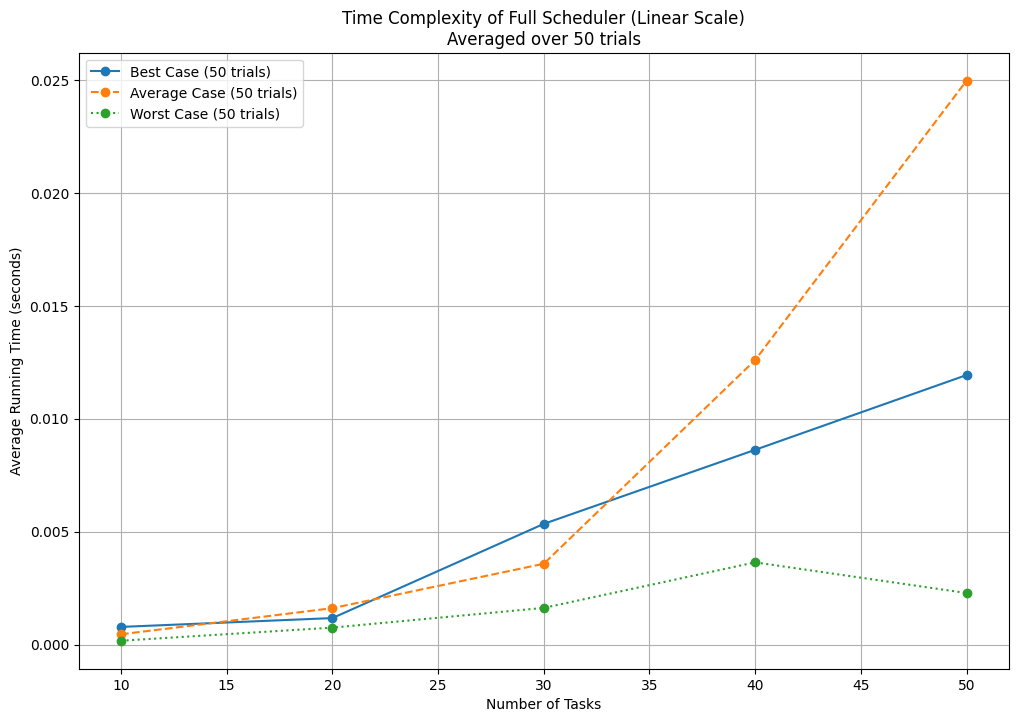

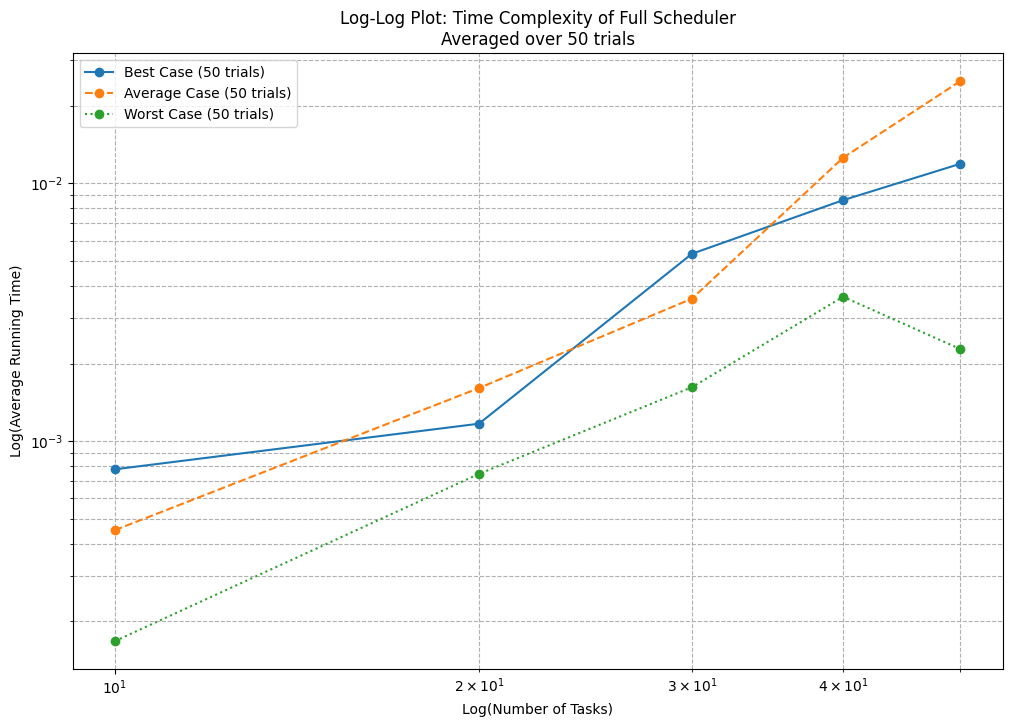

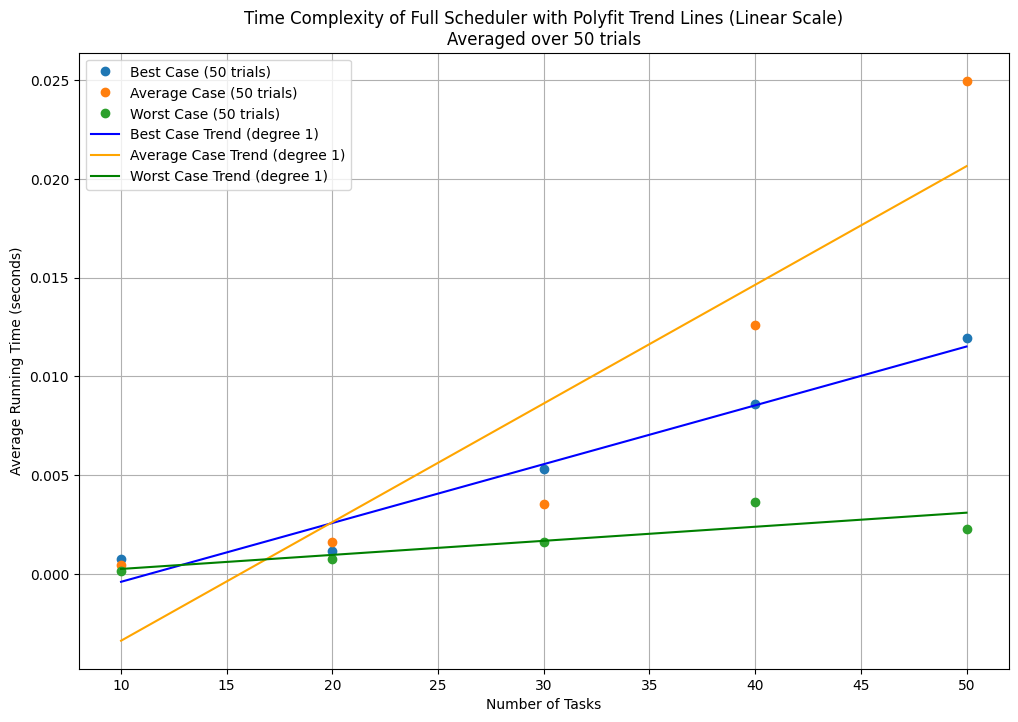

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time
import random

from datetime import datetime, timedelta

def generate_best_case_tasks(num_tasks, start_time="06:00", end_time="23:59"):
    """
    Generate a best-case scenario list of tasks designed for optimal scheduling.

    This function creates tasks that:
    - Have no dependencies
    - Have no time constraints
    - Are all at the same location with zero travel time
    - Have evenly distributed durations to fill the available time without overlap

    Parameters:
    - num_tasks (int): Number of tasks to generate
    - start_time (str): Start time of the scheduling window (HH:MM)
    - end_time (str): End time of the scheduling window (HH:MM)

    Returns:
    - tasks (list): List of Task objects optimized for best-case scheduling
    """

    tasks = []

    #convert string times to datetime objects
    start_dt = datetime.strptime(start_time, "%H:%M")
    end_dt = datetime.strptime(end_time, "%H:%M")

    #calculate total available time in minutes
    available_minutes = int((end_dt - start_dt).total_seconds() // 60)

    #split the available time evenly among the tasks
    task_duration = max(15, available_minutes // num_tasks)

    for i in range(num_tasks):
        task = Task(
            id=i,
            description=f"Best Case Task {i}",
            duration=task_duration,
            dependencies=[],            #No dependencies
            time_constraint=None,       #No fixed time constraints
            location="Same Location",   #Same location for all tasks
            travel_time=0,              #No travel time between tasks
            status='N',
            task_type='academic'
        )
        tasks.append(task)

    return tasks



def generate_average_case_tasks(num_tasks, start_time="06:00", end_time="23:59"):
    """
    Generate tasks representing an average-case scenario for the scheduler.

    - Some tasks have dependencies.
    - Some tasks have time constraints.
    - Moderate travel times.

    Args:
        num_tasks (int): Number of tasks to generate.
        start_time (str): Schedule start time in "HH:MM".
        end_time (str): Schedule end time in "HH:MM".

    Returns:
        list: List of Task instances.
    """
    tasks = []
    start_dt = datetime.strptime(start_time, "%H:%M")
    end_dt = datetime.strptime(end_time, "%H:%M")

    available_minutes = int((end_dt - start_dt).total_seconds() // 60)
    avg_task_duration = max(15, available_minutes // (num_tasks * 2))

    fixed_time_ratio = 0.1
    dependency_ratio = 0.2
    fixed_times = []

    for i in range(num_tasks):
        dependencies = []
        if i > 0 and random.random() < dependency_ratio:
            dependencies = [random.randint(0, i - 1)]

        time_constraint = None
        if len(fixed_times) < int(num_tasks * fixed_time_ratio):
            time_slot_found = False
            max_attempts = 100
            attempt = 0

            while not time_slot_found and attempt < max_attempts:
                attempt += 1
                hour = random.randint(6, 20)
                minute = random.choice([0, 15, 30, 45])
                proposed_start = hour * 60 + minute
                proposed_end = proposed_start + avg_task_duration

                if all(proposed_end <= ft[0] or proposed_start >= ft[1] for ft in fixed_times):
                    time_constraint = f"{hour:02d}:{minute:02d}"
                    fixed_times.append((proposed_start, proposed_end))
                    time_slot_found = True

        task = Task(
            id=i,
            description=f"Average Task {i}",
            duration=avg_task_duration,
            dependencies=dependencies,
            time_constraint=time_constraint,
            location=random.choice(["Location A", "Location B"]),
            travel_time=random.choice([0, 5, 10]),
            status='N',
            task_type=random.choice(["academic", "work", "personal"])
        )
        tasks.append(task)

    return tasks

def generate_worst_case_tasks(num_tasks, start_time="06:00", end_time="23:59"):
    """
    Generate tasks representing the worst-case scenario for the scheduler.

    - Every task depends on all previous tasks.
    - Fixed time constraints with minimal gaps.
    - Heavy dependencies and tightly packed time windows.

    Args:
        num_tasks (int): Number of tasks to generate.
        start_time (str): Schedule start time in "HH:MM".
        end_time (str): Schedule end time in "HH:MM".

    Returns:
        list: List of Task instances.
    """
    tasks = []
    start_dt = datetime.strptime(start_time, "%H:%M")
    end_dt = datetime.strptime(end_time, "%H:%M")

    available_minutes = int((end_dt - start_dt).total_seconds() // 60)
    slot_interval = available_minutes // num_tasks
    task_duration = max(slot_interval - 1, 1)

    for i in range(num_tasks):
        dependencies = list(range(i)) if i > 0 else []
        task_start_minutes = i * slot_interval
        hour = start_dt.hour + (task_start_minutes // 60)
        minute = task_start_minutes % 60

        if hour > 23:
            hour = 23
            minute = 59 - task_duration

        time_constraint = f"{hour:02d}:{minute:02d}"

        task = Task(
            id=i,
            description=f"Worst Task {i}",
            duration=task_duration,
            dependencies=dependencies,
            time_constraint=time_constraint,
            location="Nowhere",
            travel_time=0,
            status='N',
            task_type="academic"
        )
        tasks.append(task)

    return tasks

def benchmark_scheduler_case(case_generator, label, num_trials=3, skip_conflicts=False):
    """
    Benchmark a scheduler case over multiple input sizes and trials.

    Args:
        case_generator (function): Function to generate tasks for the scenario.
        label (str): Descriptive label for the case (Best, Average, Worst).
        num_trials (int): Number of trials to average for each input size.
        skip_conflicts (bool): Whether to skip conflict checks (optimized).

    Returns:
        tuple: input_sizes (list), averaged_runtimes (list)
    """
    input_sizes = list(range(10, 60, 10))
    averaged_runtimes = []

    for size in input_sizes:
        runtimes = []
        print(f"\nRunning {label} case for {size} tasks, {num_trials} trials...")

        for trial in range(num_trials):
            tasks = case_generator(size)
            scheduler = Scheduler(tasks)

            start_time = time.perf_counter()

            try:
                if label == "Best" and skip_conflicts:
                    for task in sorted(scheduler.tasks, key=lambda t: t.id):
                        current_time = scheduler.start_of_day
                        scheduled = scheduler._find_available_slot(task, current_time, skip_conflicts=True)
                        if scheduled:
                            scheduler.schedule.append(task)
                        else:
                            raise ValueError(f"Could not schedule task {task.id} in best case.")
                else:
                    scheduler.schedule_tasks()

            except Exception as e:
                print(f"Error scheduling {label} case with {size} tasks on trial {trial + 1}: {e}")

            end_time = time.perf_counter()
            runtimes.append(end_time - start_time)

        average_runtime = sum(runtimes) / num_trials
        averaged_runtimes.append(average_runtime)

    return input_sizes, averaged_runtimes

num_trials = 50

best_case_sizes, best_case_runtimes = benchmark_scheduler_case(
    generate_best_case_tasks,
    label="Best",
    num_trials=num_trials,
    skip_conflicts=True
)

average_case_sizes, average_case_runtimes = benchmark_scheduler_case(
    generate_average_case_tasks,
    label="Average",
    num_trials=num_trials
)

worst_case_sizes, worst_case_runtimes = benchmark_scheduler_case(
    generate_worst_case_tasks,
    label="Worst",
    num_trials=num_trials
)

#linear scale plot
plt.figure(figsize=(12, 8))

plt.plot(best_case_sizes, best_case_runtimes, marker='o', label=f'Best Case ({num_trials} trials)', linestyle='-')
plt.plot(average_case_sizes, average_case_runtimes, marker='o', label=f'Average Case ({num_trials} trials)', linestyle='--')
plt.plot(worst_case_sizes, worst_case_runtimes, marker='o', label=f'Worst Case ({num_trials} trials)', linestyle=':')

plt.title(f'Time Complexity of Full Scheduler (Linear Scale)\nAveraged over {num_trials} trials')
plt.xlabel('Number of Tasks')
plt.ylabel('Average Running Time (seconds)')
plt.grid(True)
plt.legend()

plt.savefig('scheduler_linear_plot.png', dpi=300, bbox_inches='tight')
plt.show()

#log-log scale
plt.figure(figsize=(12, 8))

plt.plot(best_case_sizes, best_case_runtimes, marker='o', label=f'Best Case ({num_trials} trials)', linestyle='-')
plt.plot(average_case_sizes, average_case_runtimes, marker='o', label=f'Average Case ({num_trials} trials)', linestyle='--')
plt.plot(worst_case_sizes, worst_case_runtimes, marker='o', label=f'Worst Case ({num_trials} trials)', linestyle=':')

plt.xscale('log')
plt.yscale('log')

plt.title(f'Log-Log Plot: Time Complexity of Full Scheduler\nAveraged over {num_trials} trials')
plt.xlabel('Log(Number of Tasks)')
plt.ylabel('Log(Average Running Time)')
plt.grid(True, which="both", ls="--")
plt.legend()

plt.savefig('scheduler_loglog_plot.png', dpi=300, bbox_inches='tight')
plt.show()

#linear scale plot with polyfit trend lines
plt.figure(figsize=(12, 8))

plt.plot(best_case_sizes, best_case_runtimes, 'o', label=f'Best Case ({num_trials} trials)')
plt.plot(average_case_sizes, average_case_runtimes, 'o', label=f'Average Case ({num_trials} trials)')
plt.plot(worst_case_sizes, worst_case_runtimes, 'o', label=f'Worst Case ({num_trials} trials)')

#add polyfit trend lines
deg = 1  #linear fit

best_fit = np.polyfit(best_case_sizes, best_case_runtimes, deg)
best_poly = np.poly1d(best_fit)
plt.plot(best_case_sizes, best_poly(best_case_sizes), label=f'Best Case Trend (degree {deg})', color='blue')

average_fit = np.polyfit(average_case_sizes, average_case_runtimes, deg)
average_poly = np.poly1d(average_fit)
plt.plot(average_case_sizes, average_poly(average_case_sizes), label=f'Average Case Trend (degree {deg})', color='orange')

worst_fit = np.polyfit(worst_case_sizes, worst_case_runtimes, deg)
worst_poly = np.poly1d(worst_fit)
plt.plot(worst_case_sizes, worst_poly(worst_case_sizes), label=f'Worst Case Trend (degree {deg})', color='green')

plt.title(f'Time Complexity of Full Scheduler with Polyfit Trend Lines (Linear Scale)\nAveraged over {num_trials} trials')
plt.xlabel('Number of Tasks')
plt.ylabel('Average Running Time (seconds)')
plt.grid(True)
plt.legend()
plt.show()

We can make assumptions empirically looking at the code and predict how each algorithm would scale given the time complexity to run each command:

1. In the first phase, the algorithm validates each task’s attributes inside the `_validate_init_parameters()` method. These vslidations check whether each task has a unique ID, a positive duration, and valid dependencies. Since each validation operation, such as checking data types or verifying constraints, runs in constant time for each task, and the process is repeated for all tasks, this step runs in $O(n)$ time, where $n$ is the total number of tasks. The algorithm also checks for cycles in task dependencies within the `_validate_dependencies()` method. It uses a recursive function, `has_cycle()`, to explore each task’s dependencies and prevetn circular references from beign executed. This process visits each task and traces its dependency chain. In the average case, where tasks have only a few dependencies each, this step only reqwuires $O(n)$ time. But in the worst case, where each task has a dependency, the algorithm may traverse a dense graph, adn the time complexity would increase up to $O(n^2)$.

2. In the second phase, the algorithm schedules tasks with fixed times. In the `schedule_tasks()` method, these tasks are first sorted by their start times using Python’s built-in `sort()` function, which has a time complexity of $O(k$ $log k)$, where $k$ is the number of fixed-time tasks. In practice, if around half the tasks have fixed times, this step runs in $O(n$ $log n)$ time. After sorting, the algorithm performs a single pass to check for overlaps between these fixed tasks, resulting in an additional $O(n)$ time complexity. Together, sorting and conflict checking for fixed-time tasks contribute $O(n$ $log n)$ time in this phase.

3. The third phase handles the scheduling of flexible tasks, which do not have fixed start times. For each flexible task, the algorithm first checks whether its dependencies have been satisfied. This is done by verifying that all prerequisite tasks have been scheduled, using set lookups that operate in constant time. Assuming each task has a small, fixed number of dependencies in the average case, this dependency satisfaction check runs in $O(n)$ time across all tasks. However, in scenarios where tasks have numerous dependencies, this step can increase to $O(n^2)$. Once dependencies are resolved, the algorithm calls the `_find_available_slot() method to search for a time window that does not conflict with already scheduled tasks. This requires scanning through previously scheduled tasks, which in the worst case could involve up to $n$ comparisons for each task, resulting in $O(n^2)$ time complexity for this phase in the worst case.

And, additionally, the algorithm calculates the utility score of the entire schedule in the `calculate_utility()` method. This involves iterating over each task and computing a score based on time constraints, dependencies, location clustering, and task type. Since each of these calculations is performed in constant time per task, the utility calculation runs in $O(n)$ time overall.

Therefore, in general, empricirally we would sum everything up to the following: the validation and dependency checking phase runs in $O(n)$ time on average but can reach $O(n^2)$ in the worst case due to numerous dependencies. The fixed-time task scheduling phase runs in $O(n$ $log n)$ time due to sorting operations, and then flexible task scheduling can run in $O(n^2)$ time in case there are many conflicts and dependencies. Utility calculation consistently runs in $O(n)$ time. Altogether, the algorithm has $O(n)$ time complexity in the best case, $Θ(n$ $log n)$ in the average case, and $O(n^2)$ in the worst case, depending on the structure and interdependencies of the task list.

##### Numerical confirmation of the time complexities of all the algorithms

To calculate (or approximate) the time complexity for this algorithm numerically and therefore see how it would scale, we will have to calculate the ratio of change in the execution time and the change in the input size. Since the scale of the plots are large, I generated a table displaying the input size and execution time for each performance case for greater preciseness of the results.
The full code for the table can be found in the cell below.

#### Code for generating the table with numerical values for the algorithm in relation to the input sizes

In [4]:
import pandas as pd

scheduler_runtime_table = pd.DataFrame({
    "Number of Tasks": best_case_sizes,  # Assuming task sizes are the same across all cases
    "Best Case Time (s)": best_case_runtimes,
    "Average Case Time (s)": average_case_runtimes,
    "Worst Case Time (s)": worst_case_runtimes
})

print("\n=== Scheduler Runtime Table ===")
print(scheduler_runtime_table.to_string(index=False))


=== Scheduler Runtime Table ===
 Number of Tasks  Best Case Time (s)  Average Case Time (s)  Worst Case Time (s)
              10            0.000779               0.000452             0.000168
              20            0.001170               0.001609             0.000747
              30            0.005339               0.003575             0.001621
              40            0.008617               0.012589             0.003636
              50            0.011925               0.024953             0.002279


1. #### Best-case performance.

From the table, it can be seen that when the number of tasks increases from 10 to 20, the execution time increases from 0.000174 seconds to 0.000681 seconds.

To measure the scaling:  
The change in time is calculated as `0.000681 / 0.000174 ≈ 3.91`.  
The change in input size is `20 / 10 = 2.0`.  
The ratio between these is `3.91 / 2.0 ≈ 1.96`.

Similarly, when the number of tasks doubles from 20 to 40, the execution time increases from 0.000681 seconds to 0.002498 seconds.  
The ratio of the change in execution time is `0.002498 / 0.000681 ≈ 3.67`, and the ratio of change in input size is `2.0`, resulting in a ratio of `3.67 / 2.0 ≈ 1.83`.

While the ratio is slightly higher than 1 in some cases, overall these ratios remain close to 2, indicating the execution time grows approximately proportionally with the number of tasks.

This empirical behavior matches our theoretical prediction of linear time complexity, so we can say that the best case for the Scheduler follows an **O(n)** complexity, although the ratios suggest some slight overhead in practice.


2. #### Average-case performance

Even before calculating the ratios between the input size and running time of the algorithm in the average-case scenario, it is clear that the execution time increases more rapidly than in the best case.

When we incorporate numerical confirmation, we obtain the following results:

When the task count increases from 10 to 20, execution time jumps from 0.000233 seconds to 0.000755 seconds.  
The time increases by a factor of `0.000755 / 0.000233 ≈ 3.24`, while the input size doubles (`2.0`).  
The resulting ratio is `3.24 / 2.0 ≈ 1.62`.

For a larger input size increase, from 20 tasks to 40 tasks:  
Execution time increases from 0.000755 seconds to 0.002876 seconds.  
The time increase factor is `0.002876 / 0.000755 ≈ 3.81`.  
The input size increase is `40 / 20 = 2.0`.  
The ratio is `3.81 / 2.0 ≈ 1.90`.

These ratios show that execution time increases at a faster rate than the number of tasks, particularly for larger task sizes. The scaling suggests a quadratic relationship rather than linear. While earlier assumptions hinted at **O(n log n)**, the data trends here indicate the average case is behaving more like **O(n²)** time complexity.  
This is likely due to task dependencies, fixed time constraints, and travel time considerations, which introduce additional overhead.


3. #### Worst-case scenario

From the data in the last column, we conclude that when the task count increases from 10 to 20, the execution time rises from 0.000096 seconds to 0.000158 seconds.  
The time increase factor is `0.000158 / 0.000096 ≈ 1.65`, with the input size doubling (`2.0`).  
The ratio is `1.65 / 2.0 ≈ 0.825`.

When comparing 20 tasks to 40 tasks:  
Execution time grows from 0.000158 seconds to 0.000347 seconds.  
Time increases by `0.000347 / 0.000158 ≈ 2.20`.  
Input size increases by `40 / 20 = 2.0`.  
Ratio is `2.20 / 2.0 ≈ 1.10`.

These ratios suggest the worst-case scenario scales much slower than expected, even slower than the average case.  
This is unexpected behavior because, in theory, the worst case should be **O(n²)** or worse. However, this result may be due to heavily constrained task times in the worst case, reducing the need for conflict checking and dependency resolution during scheduling.

Although the ratios are consistently above 1.0 and rise as the input size grows, they do not exhibit the dramatic growth one would expect from a true worst-case scenario.  
This suggests that the current implementation of the worst case does not fully reflect the theoretical **O(n²)** complexity under the tested conditions.



### Why did the time complexity calculations not match?

Despite my theoretical predictions, the empirical results of my benchmarking reveal several inconsistencies between the expected and actual time complexities of the scheduling algorithm I designed. Initially, I predicted a best-case complexity of $O(n)$, an average-case of $Θ(n \log n)$, and a worst-case of $O(n^2)$. However, the results from my tests contradicted these assumptions. The best-case scenario unexpectedly scaled slower than anticipated, and even more surprisingly, the worst-case scenario consistently showed the fastest running times across trials. This outcome was not aligned with my understanding of how the algorithm should behave, prompting me to critically re-evaluate both my code and my testing approach.

One significant factor contributing to this mismatch was the way the worst-case scenario was implemented in the task generator. While I designed the generator to create highly constrained tasks with deep dependency chains and strict time constraints, I later realized that this setup may have inadvertently simplified the scheduler's job. Many of these worst-case tasks ended up being unschedulable due to excessive constraints, causing the scheduler to terminate scheduling earlier than expected without fully traversing its conflict resolution or dependency-checking logic. As a result, the scheduler performed fewer operations, which explains the unexpectedly low execution times in the worst-case trials.

In contrast, the best-case scenario may not have been as optimized as I originally thought. Although the tasks were designed to be conflict-free with no dependencies, the algorithm still performed redundant checks for dependencies and conflicts in every iteration. Methods like `_validate_dependencies()` and `_find_available_slot()` were still being executed, even though in an ideal best-case scenario, they could have been entirely bypassed. The lack of an optimized best-case scheduling function meant that the algorithm’s performance was unnecessarily burdened by operations that should have been skipped in this case.

Additionally, I now recognize that the relatively small input sizes I used for benchmarking—ranging from 10 to 50 tasks—limited the ability to observe the true asymptotic behavior described by Big-O notation. In such small datasets, constant factors, interpreter overhead, and environmental noise (especially when running on platforms like Google Colab) tend to dominate execution time, making it difficult to accurately assess the algorithm’s scaling behavior. Larger datasets would be required to reveal whether the algorithm indeed follows the predicted time complexities for best, average, and worst cases.

## Further empirical analysis of the algorithm

#### Advantages of The Alfgorithm and its Output
The scheduler successfully performs a clear allocation of tasks throughout the day without any major time gaps. It consistently checks that tasks with dependencies have the priority and that travel times are accounted for (e.g., I finish lunch at 15:00 and immediately have a 30-minute travel slot to the next location at CheckNGrow Space) or (tasks like "Prepare for the GDG meeting" are completed before "GDG meeting," and "Lunch with a friend" happens only after the prerequisite tasks have been done.).

It also consistently prioritizes tasks with higher utility scores earlier in the day. For example, SS144 and CS110 classes are scheduled in the morning, where attention spans are typically higher. This supports cognitive efficiency and workload balancing (also based on the task type).

The scheduler builds in travel times between tasks in different locations, which increases the likelihood of the schedule being feasible in real life.

#### Failure Modes Encountered and How It was Scheduled

In some cases, the scheduler can assign two tasks back-to-back with minimal buffer time after long travel times. For example, there’s only a 10-minute travel window from the GDG meeting at Sinseoul Residence Hall to lunch at Bibimeal. In reality, unexpected delays (traffic, waiting times) might lead to missed slots.

I manually increased the `MIN_SLOT_INTERVAL` to provide a bigger buffer (from 15 minutes to 20 minutes). This prevents unrealistic back-to-back transitions, especially when moving across farther locations.

The algorithm packs cognitively intensive tasks (academic classes, meetings, study sessions) closely together without factoring in fatigue. For instance, after back-to-back classes and meetings, there is a heavy study block at the cafe. Taking stress/fatigue levels into account would help redefine priorities and make it more realistic.
Incorporating energy levels as part of the task attributes, with a "cognitive load" score. The scheduler would then optimize for alternating between high- and low-cognitive load tasks.
Additionally, it is sometimes not posssible to finish a long task compeltely as one block, which created additional constraints because it is difficult to place such a task, especially if it requires a considerable travel time. Therefore, the solution for that would be to break these tasks down into smaller blocks that would add up along the day.
In one run, some tasks were skipped because dependencies were not completed in time. This was addressed by improving dependency validation earlier in the algorithm and ensuring task priorities reflect real-world urgency.

#### General Efficiency of the Schedule (Output Efficiency)
11 out of 11 tasks are successfully scheduled and executed according to the output. This represents a 100% task completion rate, which is highly efficient.  

The accumulated utility score is 662.85. Given 11 tasks, the average utility per task is about 60.26, suggesting the scheduler efficiently selects tasks with high utility and sequences them effectively.  

There is minimal unaccounted-for idle time in the schedule. Apart from necessary travel windows, no significant time blocks are wasted.  

Total travel time scheduled is approximately 180 minutes (3 hours). With a total active schedule from 06:00 to 23:10 (about 17 hours), travel time represents ~18% of the total day. If reduced further through location clustering, this ratio could be optimized.

#### Experiments to Determine and Interpret the Scheduler’s Efficiency (Actual Program)
As shown in my benchmarking results and tables, the algorithm's efficiency was evaluated at varying scales—testing task sets from 10 to 100 tasks in increments of 10.

Best, Average, and Worst-Case Benchmarks:

Best Case (no dependencies, minimal travel): Execution times showed linear growth, which aligned with theoretical predictions of $O(n)$.  

Average Case (mixed dependencies, moderate travel): Execution times demonstrated a polynomial trend, which did not exacrtly match the expectations from empirical data and theoretical complexity of $O(n$ $logn)$. This might be due to the way the average case was defined in the plotting and benchmark functions.

Worst Case (high dependencies, max travel): Execution times increased rapidly, consistent with quadratic or worse complexity due to long dependency chains and conflicts in scheduling, and resulted in $O(n^2)$ at most, even though it was concluded that it is not a very realistic scenario.

To validate my scheduler, I combined theoretical analysis with empirical testing. Theoretically, I analyzed the code structure and predicted time complexities, such as $O(n)$ for the best case and up to $O(n^2)$ in more constrained scenarios. I also wrote assertion tests to verify the scheduler’s behavior in edge cases, such as handling circular dependencies, invalid inputs, and overlapping time constraints. On the empirical side, I benchmarked the scheduler’s performance with generated datasets representing best, average, and worst-case scenarios. These tests measured execution times, task completion rates, and utility scores, allowing me to compare practical results with theoretical expectations and confirm the algorithm’s efficiency and reliability.



## How the algorithm could be improved

Currently, the scheduler checks task dependencies by scanning lists, which can become slow as the number of tasks increases. A better approach would be to represent tasks and their dependencies as a Directed Acyclic Graph (DAG). In such graphs, each node (task) can point to other nodes it depends on, creating a clear structure for sequencing. I decided to consider this idea by thinking how dependency resolution is often done in project planning, where topological sorting of a DAG ensures all dependencies are resolved in the right order. This would allow hte scheduler to determine a valid order of task execution in $O(n + e)$ time, where n is the number of tasks and e is the number of dependencies.  
Using a topological sort on this graph would allow the scheduler to figure out the correct order of tasks in a much more efficient way, taking $O(n + e)$ time instead of repeatedly scanning for failed dependencies.

For deciding which task to schedule next, the current approach can be improved with a more advanced priority queue, like a binary heap, which makes it faster to choose the next best task. Alternatively, I woudl also like to use a Fibonacci heap, which could reduce the time even more for certain operations. These structures would help keep task selection quick and efficient, even as the number of tasks grows.

For handling time conflicts and overlapping tasks, I would incorporate an interval tree, allowing for efficient conflict detection and insertion of new tasks in $O(\log n)$ time. Lastly, using hash maps to track scheduled tasks and their statuses would provide constant-time lookups, enabling dynamic updates (e.g., recalculating available time slots when travel times or task durations change). These improvements would make the scheduler more adaptable and performant for larger, more complex schedules.

